# **Componentes de uma série temporal**
- **Tendência**
- **Ciclo**
- **Sazonalidade**
- **Resíduo:**

# **Air passengers - conjunto de dados tradicional do livro Box Jenkins**

Este conjunto de dados é um clássico da série temporal, sobre a suposta companhia aérea Box & Jenkins, com dados de total de passageiros de linhas áreas internacionais, de 1949 a 1960, por mês.

### **Carregando o conjunto de dados**

In [1]:
# Importando biblioteca necessária
import pandas as pd

In [2]:
# Importando o conjunto de dados
file = 'https://raw.githubusercontent.com/rogeriodelfim/Dataset/main/Passageiros/passageiros.csv'
passageiros = pd.read_csv(
    filepath_or_buffer = file, 
    sep=','
)

In [3]:
# Espiando o conjunto de dados
passageiros

,ano_mes,passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# Espiando a estrutura conjunto de dados
passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ano_mes      144 non-null    object
 1   passageiros  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### **Transformando o conjunto de dados**

In [5]:
# Transferindo a coluna ano_mes para o índice
passageiros = passageiros.set_index('ano_mes')

In [6]:
# Espiando o resultado
passageiros

,passageiros
ano_mes,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [7]:
# Alterando o tipo do índice para DatetimeIndex com frequência mensal
passageiros.index = pd.DatetimeIndex(passageiros.index ,freq='MS')

In [8]:
# Verificando o tipo do índice do dataframe
passageiros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='ano_mes', length=144, freq='MS')

In [9]:
# Transformando o atributo 'data' em datetime
#passageiros['ano_mes'] = pd.to_datetime(passageiros['ano_mes'], format="%Y-%m")

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
- https://pandas.pydata.org/docs/user_guide/timeseries.html
- https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

### **Criando a série temporal**

In [10]:
# Criando a  Serie temporal
serie_passageiros = pd.Series(
    data = passageiros['passageiros'].values, 
    index = passageiros.index.values
)

# Espiando o resultado
serie_passageiros

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

### **Visualização da Série**

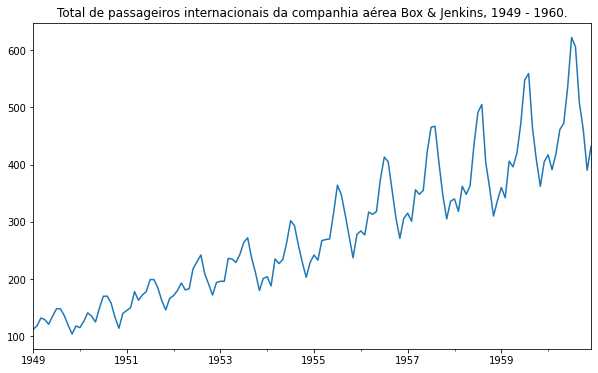

In [11]:
# Gerando o gráfico da Serie
serie_passageiros.plot(
    title = 'Total de passageiros internacionais da companhia aérea Box & Jenkins, 1949 - 1960.',
    figsize =(10, 6)
);

### **Decomposição da série**

In [12]:
# Importando biblioteca necessária
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
# Decompondo a série
decomposicao = seasonal_decompose(serie_passageiros,freq=12)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\816151787.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao = seasonal_decompose(serie_passageiros,freq=12)


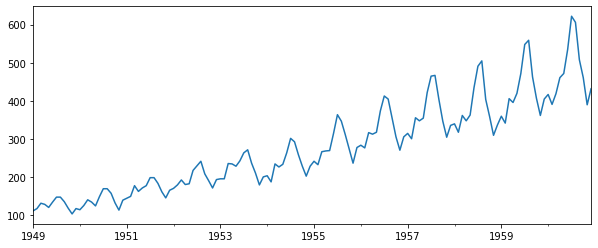

In [14]:
# Saida dos valores observados
decomposicao.observed.plot(figsize=(10,4));

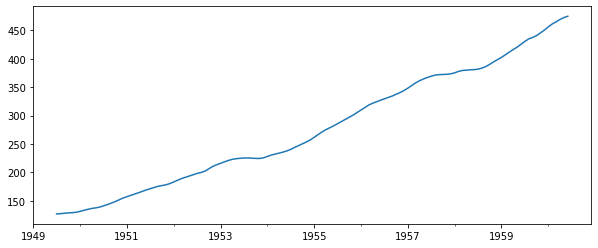

In [15]:
# Saida da tendência
decomposicao.trend.plot(figsize=(10,4));

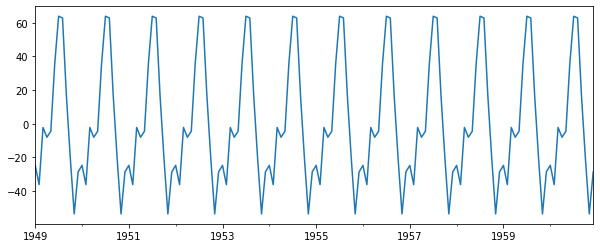

In [16]:
# Saida da sazonalidade
decomposicao.seasonal.plot(figsize=(10,4));

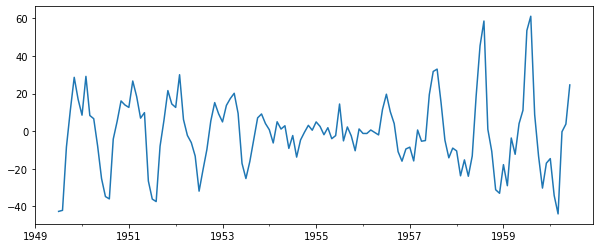

In [17]:
# Saida dos resíduos
decomposicao.resid.plot(figsize=(10,4));

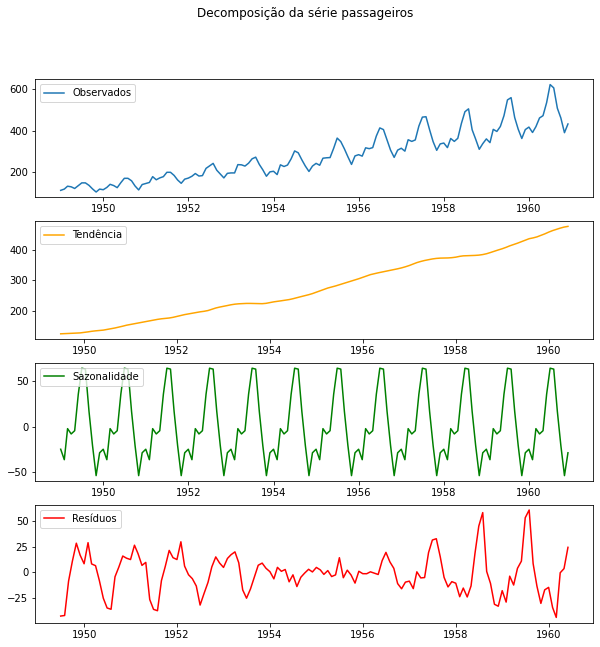

In [18]:
# Importando biblioteca necessária
import matplotlib.pyplot as plt

# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao.trend, color = 'orange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao.seasonal, color = 'green', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao.resid, color = 'red', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série passageiros');

# Exibindo o gráfico
plt.show()


- https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

#### **Decomposição da série - Modelo multiplicativo**

- **Modelo aditivo:** Serie = Tendência **+** Sazonalidade **+** Ruído
- **Modelo aditivo:** Serie = Tendência **x** Sazonalidade **x** Ruído



In [19]:
# Decompondo a série
decomposicao_mul = seasonal_decompose(serie_passageiros,model='multiplicative',freq=12)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\3634804051.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao_mul = seasonal_decompose(serie_passageiros,model='multiplicative',freq=12)


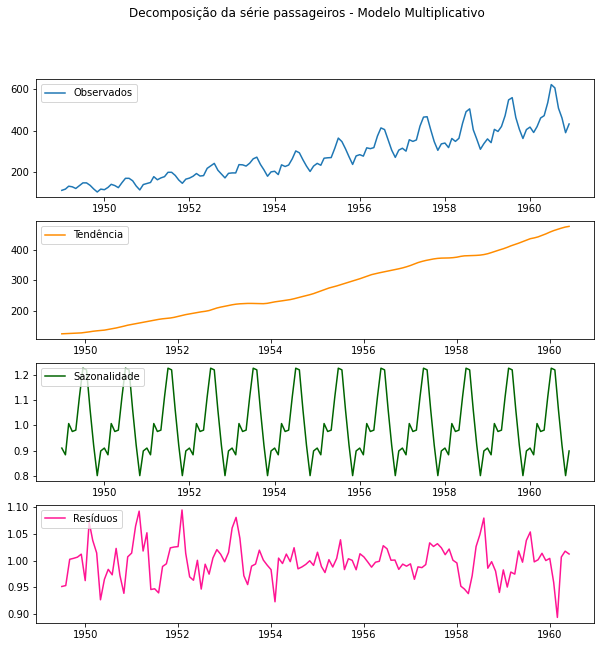

In [20]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao_mul.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao_mul.trend, color = 'darkorange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao_mul.seasonal, color = 'darkgreen', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao_mul.resid, color = 'deeppink', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série passageiros - Modelo Multiplicativo');

# Exibindo o gráfico
plt.show()

# **Meteorologia com dados do Instituto Nacional de Metereologia - INMET**

### **Carregando o conjunto de dados**

In [21]:
# Importando o conjunto de dados
file = 'https://raw.githubusercontent.com/rogeriodelfim/Dataset/main/inmet/inmet.csv'
inmet = pd.read_csv(
    filepath_or_buffer = file, 
    sep=';',
    decimal='.'
)

In [22]:
# Espiando o conjunto de dados
inmet

,data,precipitacao_total,pressao_atmosferica_media,temperatura_ponto_orvalho_media,temperatura_media,umidade_ar_media,velocidade_vento_media,municipio
0,2003-01-19,NaN,NaN,NaN,NaN,NaN,NaN,Belém
1,2003-01-20,NaN,NaN,NaN,NaN,84.461538,NaN,Belém
2,2003-01-21,4.8,1009.108333,22.750000,25.233333,86.750000,1.370833,Belém
3,2003-01-22,6.0,1009.220833,22.837500,25.275000,86.791667,1.037500,Belém
4,2003-01-23,0.0,1010.320833,22.675000,25.104167,86.708333,1.358333,Belém
...,...,...,...,...,...,...,...,...
29910,2020-12-27,3.6,1008.137500,21.754167,27.004167,73.916667,1.316667,Salvador
29911,2020-12-28,0.0,1008.787500,20.820833,27.208333,68.625000,1.262500,Salvador
29912,2020-12-29,0.0,1007.187500,20.275000,25.962500,71.375000,1.104167,Salvador
29913,2020-12-30,2.8,1006.908333,21.033333,25.875000,75.458333,1.175000,Salvador


In [23]:
# Espiando a estrutura conjunto de dados
inmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29915 entries, 0 to 29914
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   data                             29915 non-null  object 
 1   precipitacao_total               26706 non-null  float64
 2   pressao_atmosferica_media        27408 non-null  float64
 3   temperatura_ponto_orvalho_media  27301 non-null  float64
 4   temperatura_media                26951 non-null  float64
 5   umidade_ar_media                 27964 non-null  float64
 6   velocidade_vento_media           23252 non-null  float64
 7   municipio                        29915 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.8+ MB


### **Transformando o conjunto de dados**

In [24]:
# Filtrando Salvador e a série de 2010 a 2020
inmet_ssa = inmet.query('(municipio=="Salvador") & (data>"2009-12-31")')

In [25]:
# Selecionando somente temperatura 
# Colocando data como índice
inmet_ssa = inmet_ssa[['data','temperatura_media']].set_index('data')

In [26]:
# Espiando o resultado
inmet_ssa

,temperatura_media
data,
2010-01-01,27.270833
2010-01-02,26.137500
2010-01-03,25.683333
2010-01-04,26.929167
2010-01-05,26.729167
...,...
2020-12-27,27.004167
2020-12-28,27.208333
2020-12-29,25.962500


In [27]:
# Alterando o tipo do índice para DatetimeIndex com frequência mensal
inmet_ssa.index = pd.DatetimeIndex(inmet_ssa.index ,freq='D')

In [28]:
# Verificando o tipo do índice do dataframe
inmet_ssa.index

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='data', length=4018, freq='D')

### **Visualização da Série**

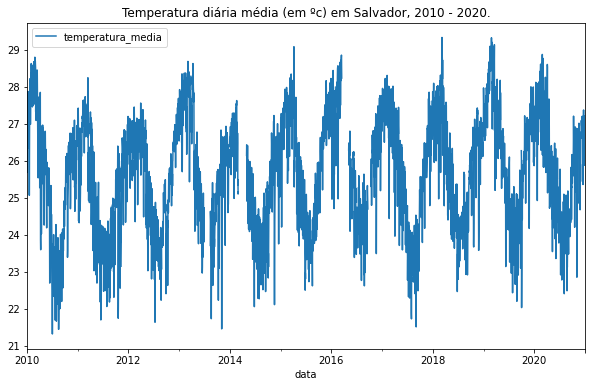

In [29]:
# Gerando o gráfico
inmet_ssa.plot(
    title = 'Temperatura diária média (em ºc) em Salvador, 2010 - 2020.',
    figsize =(10, 6)
)

# Exibindo o gráfico
plt.show()

### **Decomposição da série - Modelo aditivo**

In [30]:
# Importando biblioteca necessária
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
# Decompondo a série
decomposicao = seasonal_decompose(inmet_ssa)

ValueError: This function does not handle missing values

O statsmodels não consegue decompor a série pois tem valores perdidos

In [32]:
# Imputando os valores perdidos
inmet_ssa['temperatura_media'] = inmet_ssa['temperatura_media'].fillna(value=inmet_ssa['temperatura_media'].mean())
inmet_ssa

,temperatura_media
data,
2010-01-01,27.270833
2010-01-02,26.137500
2010-01-03,25.683333
2010-01-04,26.929167
2010-01-05,26.729167
...,...
2020-12-27,27.004167
2020-12-28,27.208333
2020-12-29,25.962500


In [33]:
# Decompondo a série - com missing preenchidos pela média
decomposicao = seasonal_decompose(
    x = inmet_ssa, 
    model='additive', 
    freq = 365
)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\2786133562.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao = seasonal_decompose(


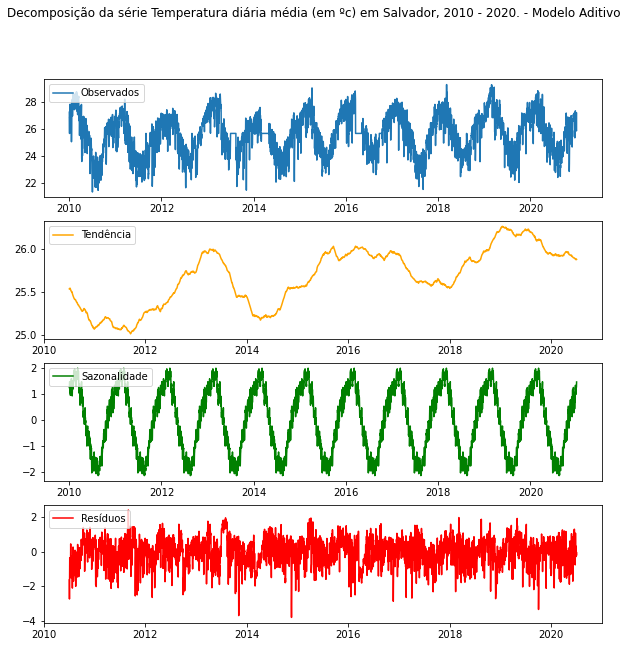

In [34]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao.trend, color = 'orange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao.seasonal, color = 'green', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao.resid, color = 'red', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série Temperatura diária média (em ºc) em Salvador, 2010 - 2020. - Modelo Aditivo');

# Exibindo o gráfico
plt.show()

### **Decomposição da série - Modelo multiplicativo**

In [35]:
# Decompondo a série com modelo multiplicativo
decomposicao_mul = seasonal_decompose(
    x = inmet_ssa, 
    model='multiplicative', 
    freq = 365
)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\4024277071.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao_mul = seasonal_decompose(


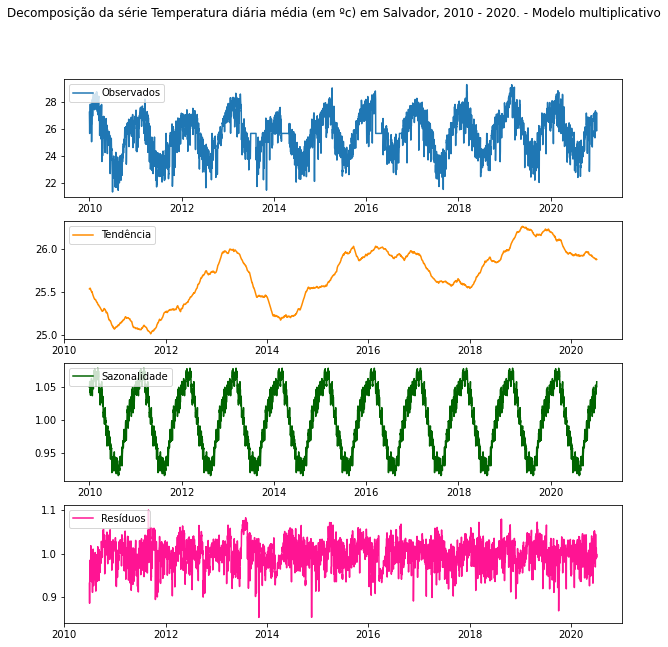

In [36]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao_mul.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao_mul.trend, color = 'darkorange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao_mul.seasonal, color = 'darkgreen', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao_mul.resid, color = 'deeppink', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série Temperatura diária média (em ºc) em Salvador, 2010 - 2020. - Modelo multiplicativo');

# Exibindo o gráfico
plt.show()

# **Salário Mínimo no Brasil**

### **Carregando o conjunto de dados**

In [38]:
# Importando o conjunto de dados
file = 'https://raw.githubusercontent.com/rogeriodelfim/Dataset/main/salario_minimo_brasil/salario_minimo.csv'
sm = pd.read_csv(
    filepath_or_buffer = file, 
    sep=';',
    decimal=','
)

In [39]:
# Espiando o conjunto de dados
sm

,anomes,sm
0,1994-07-01,64.79
1,1994-08-01,64.79
2,1994-09-01,70.00
3,1994-10-01,70.00
4,1994-11-01,70.00
...,...,...
331,2022-02-01,1212.00
332,2022-03-01,1212.00
333,2022-04-01,1212.00
334,2022-05-01,1212.00


### **Transformando o conjunto de dados**

In [40]:
# Selecionando somente temperatura 
sm = sm.set_index('anomes')

In [41]:
# Alterando o tipo do índice para DatetimeIndex com frequência mensal
sm.index = pd.DatetimeIndex(sm.index ,freq='MS')

### **Visualização da Série**

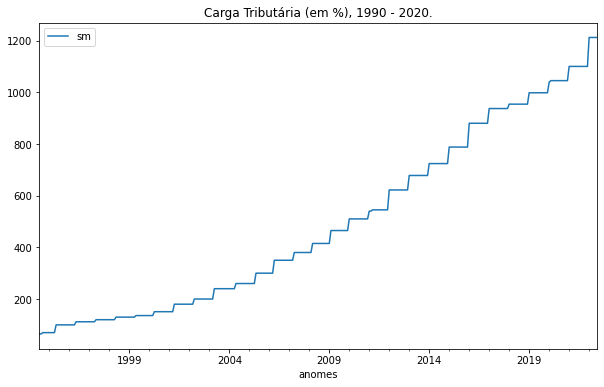

In [42]:
# Gerando o gráfico
sm.plot(
    title = 'Carga Tributária (em %), 1990 - 2020.',
    figsize =(10, 6)
);

### **Decomposição da série - Modelo aditivo**

In [43]:
# Importando biblioteca necessária
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
# Decompondo a série - modelo aditivo
decomposicao_add = seasonal_decompose(
    x = sm, 
    model='additive',
    freq = 12
)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\329161661.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao_add = seasonal_decompose(


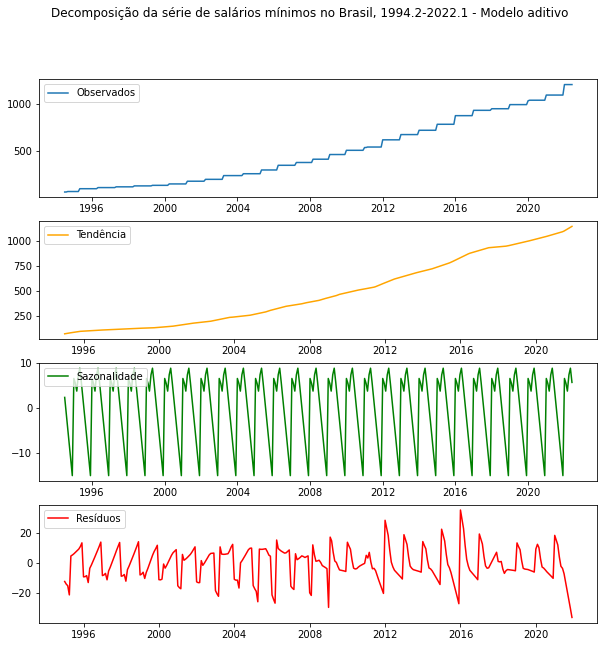

In [45]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao_add.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao_add.trend, color = 'orange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao_add.seasonal, color = 'green', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao_add.resid, color = 'red', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série de salários mínimos no Brasil, 1994.2-2022.1 - Modelo aditivo');

# Exibindo o gráfico
plt.show()

### **Decomposição da série - Modelo multiplicativo**

In [46]:
# Decompondo a série com modelo multiplicativo
decomposicao_mul = seasonal_decompose(
    x = sm, 
    model='multiplicative', 
    freq = 12
)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\896878215.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao_mul = seasonal_decompose(


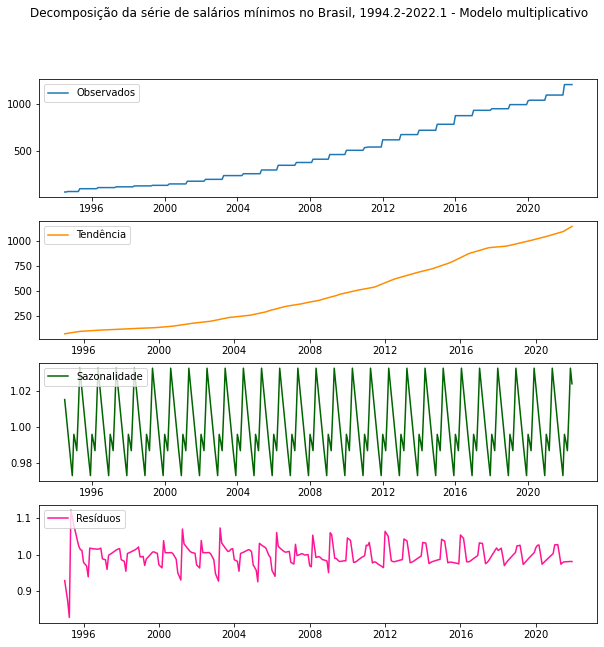

In [47]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao_mul.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao_mul.trend, color = 'darkorange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao_mul.seasonal, color = 'darkgreen', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao_mul.resid, color = 'deeppink', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série de salários mínimos no Brasil, 1994.2-2022.1 - Modelo multiplicativo');

# Exibindo o gráfico
plt.show()

# **Carga Tributária Bruta - Secretaria do Tesouro Nacional**

Percentual, em relação ao PIB, do total de impostos, taxas e contribuições compulsoriamente pagos pelo setor privado ao governo.

### **Carregando o conjunto de dados**

In [51]:
# Importando o conjunto de dados
file = 'https://raw.githubusercontent.com/rogeriodelfim/Dataset/main/receita_tributaria_total/receita_tributaria_total.csv'

ctb = pd.read_csv(
    filepath_or_buffer = file, 
    sep=';',
    decimal=','
)

In [52]:
# Espiando o conjunto de dados
ctb

,ano,receita_tributaria_total
0,1990,28.48
1,1991,23.55
2,1992,24.46
3,1993,25.37
4,1994,28.31
...,...,...
27,2017,32.28
28,2018,32.58
29,2019,32.53
30,2020,31.50


### **Transformando o conjunto de dados**

In [53]:
# Selecionando somente temperatura 
# Colocando data como índice
ctb = ctb.set_index('ano')

### **Visualização da Série**

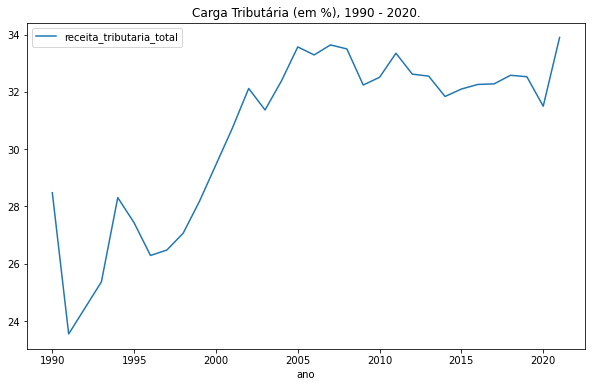

In [54]:
# Gerando o gráfico
ctb.plot(
    title = 'Carga Tributária (em %), 1990 - 2020.',
    figsize =(10, 6)
);

### **Decomposição da série - Modelo aditivo**

In [55]:
# Importando biblioteca necessária
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
# Decompondo a série - modelo aditivo
decomposicao_add = seasonal_decompose(
    x = ctb, 
    model='additive', 
    freq = 1
)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\2801898972.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao_add = seasonal_decompose(


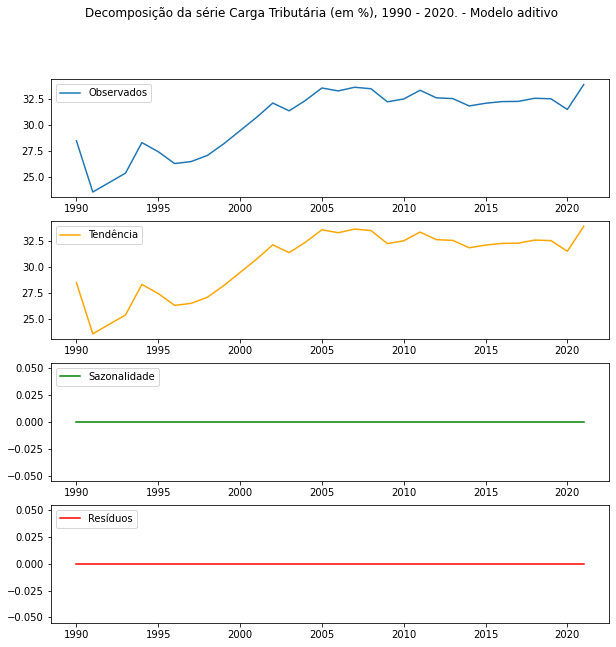

In [57]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao_add.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao_add.trend, color = 'orange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao_add.seasonal, color = 'green', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao_add.resid, color = 'red', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série Carga Tributária (em %), 1990 - 2020. - Modelo aditivo');

# Exibindo o gráfico
plt.show()

### **Decomposição da série - Modelo multiplicativo**

In [58]:
# Decompondo a série com modelo multiplicativo
decomposicao_mul = seasonal_decompose(
    x = ctb, 
    model='multiplicative', 
    freq = 1
)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\529384316.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao_mul = seasonal_decompose(


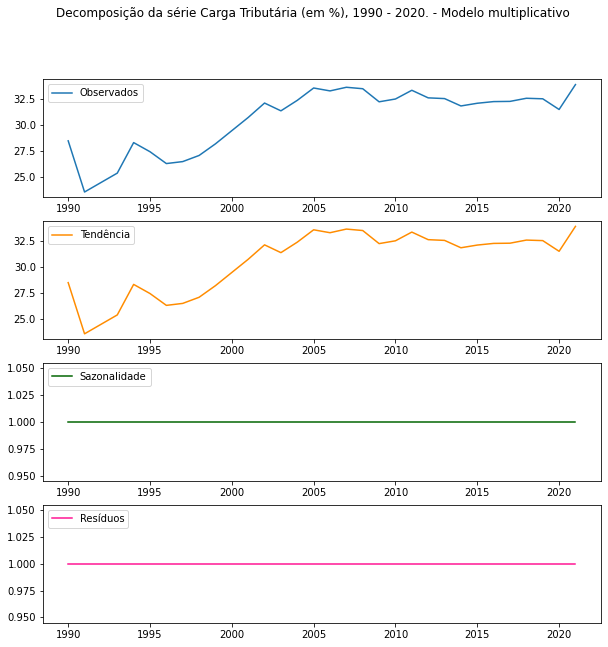

In [59]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao_mul.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao_mul.trend, color = 'darkorange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao_mul.seasonal, color = 'darkgreen', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao_mul.resid, color = 'deeppink', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série Carga Tributária (em %), 1990 - 2020. - Modelo multiplicativo');

# Exibindo o gráfico
plt.show()

# **Covid-19**

### **Carregando o conjunto de dados**

In [61]:
# Importando o conjunto de dados
file = 'https://raw.githubusercontent.com/rogeriodelfim/Dataset/main/covid19_brasil/cases-brazil-states.csv'

covid = pd.read_csv(
    filepath_or_buffer = file, 
    sep=',',
    decimal='.'
)

In [62]:
# Espiando o conjunto de dados
covid

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20981,213,2022-03-31,Brazil,SC,TOTAL,2,21662,1425,1676215,21662,...,2568392.0,35847.42493,6165669.0,86.05515,5386762.0,75.18383,277356.0,3.87110,2344651.0,32.72464
20982,213,2022-03-31,Brazil,SE,TOTAL,2,6317,143,325921,6317,...,604183.0,26283.72782,1952131.0,84.92341,1701701.0,74.02897,40326.0,1.75430,835513.0,36.34726
20983,213,2022-03-31,Brazil,SP,TOTAL,72,167374,8426,5257693,167374,...,19501783.0,42469.91918,41899567.0,91.24659,38418498.0,83.66571,1230847.0,2.68047,23431867.0,51.02864
20984,213,2022-03-31,Brazil,TO,TOTAL,1,4144,95,302826,4144,...,903975.0,57473.10960,1133361.0,72.05706,923534.0,58.71664,47653.0,3.02969,322307.0,20.49170


### **Transformando o conjunto de dados**

In [63]:
# Calculando a população baseado
covid['population'] = covid['totalCases'] \
                  .div(covid['totalCases_per_100k_inhabitants'])\
                  .mul(100000)

In [64]:
# Calculando a taxa de mortalidade
covid['newDeaths_per_100k_inhabitants'] = covid['newDeaths']\
  .div(covid['population'])\
  .mul(100000)

In [65]:
# Filtrando somente os resultado para TOTAL do Brasil
covid_BR = covid.query('state=="TOTAL"')

In [66]:
# Selecionando somente temperatura 
# Colocando data como índice
covid_BR = covid_BR[['date','newDeaths_per_100k_inhabitants']].set_index('date')

In [67]:
# Espiando o resultado
covid_BR

,newDeaths_per_100k_inhabitants
date,
2020-02-25,0.000000
2020-02-26,0.000000
2020-02-27,0.000000
2020-02-28,0.000000
2020-02-29,0.000000
...,...
2022-03-27,0.050629
2022-03-28,0.031877
2022-03-29,0.131728


In [68]:
# Alterando o tipo do índice para DatetimeIndex com frequência mensal
covid_BR.index = pd.DatetimeIndex(covid_BR.index ,freq='D')

In [69]:
# Verificando o tipo do índice do dataframe
covid_BR.index

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05',
               ...
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31'],
              dtype='datetime64[ns]', name='date', length=766, freq='D')

### **Visualização da Série**

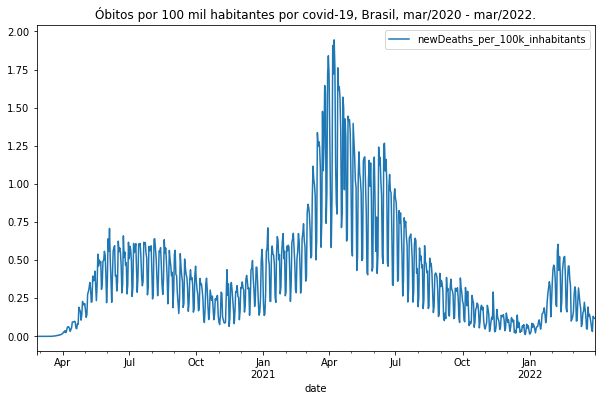

In [70]:
# Gerando o gráfico
covid_BR.plot(
    title = 'Óbitos por 100 mil habitantes por covid-19, Brasil, mar/2020 - mar/2022.',
    figsize =(10, 6)
);

### **Decomposição da série - Modelo aditivo**

In [71]:
# Importando biblioteca necessária
from statsmodels.tsa.seasonal import seasonal_decompose

In [72]:
# Decompondo a série - modelo aditivo
decomposicao_add = seasonal_decompose(
    x = covid_BR, 
    model='additive', 
    freq = 7
)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\3930729866.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao_add = seasonal_decompose(


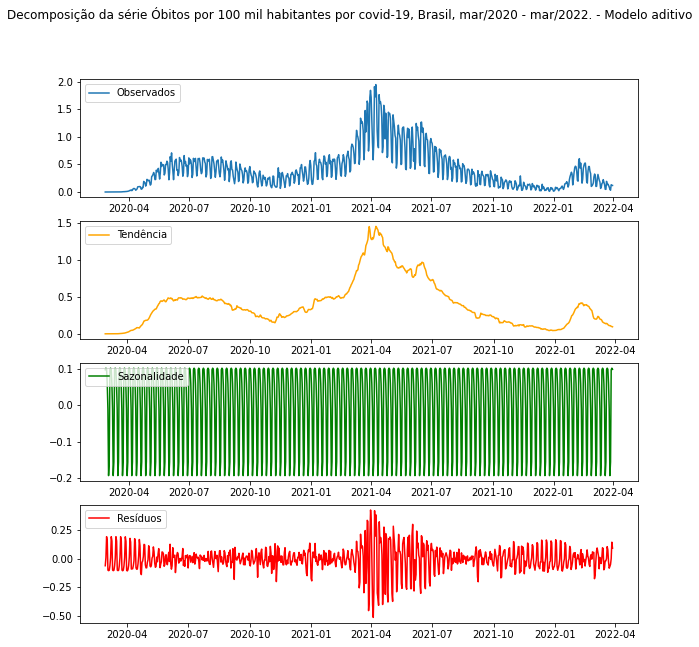

In [73]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao_add.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao_add.trend, color = 'orange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao_add.seasonal, color = 'green', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao_add.resid, color = 'red', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série Óbitos por 100 mil habitantes por covid-19, Brasil, mar/2020 - mar/2022. - Modelo aditivo');

# Exibindo o gráfico
plt.show()

### **Decomposição da série - Modelo multiplicativo**

In [74]:
# Decompondo a série com modelo multiplicativo
decomposicao_mul = seasonal_decompose(
    x = covid_BR, 
    model='multiplicative', 
    freq = 7
)

C:\Users\roger\AppData\Local\Temp\ipykernel_37796\961753628.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposicao_mul = seasonal_decompose(


ValueError: Multiplicative seasonality is not appropriate for zero and negative values